[INFO] Number of numeric variables: 14


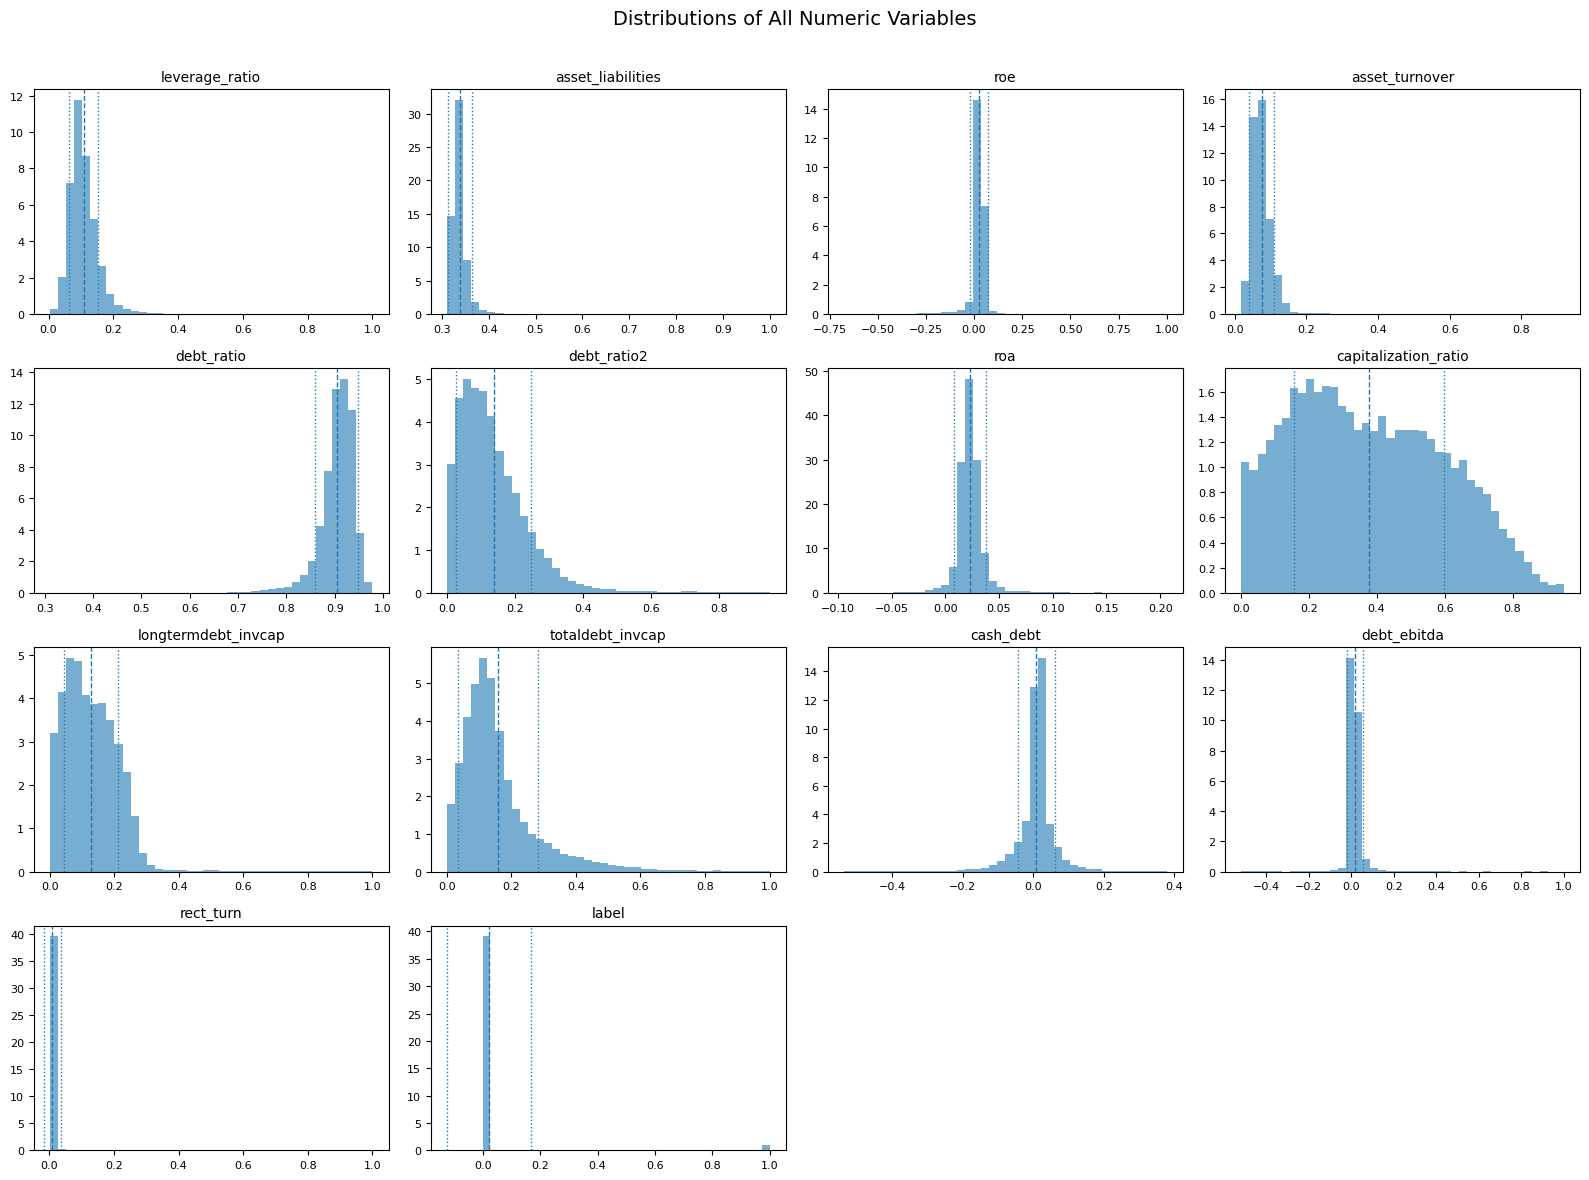

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

# ---------------------------------
# 0) 데이터 로드
# ---------------------------------
df = pd.read_csv("training_data.csv")

# ---------------------------------
# 1) 수치형 컬럼만 선택
# ---------------------------------
num_df = df.select_dtypes(include=[np.number]).copy()

# 불필요한 인덱스 컬럼 제거 (있을 경우)
for col in ["Unnamed: 0", "index", "id"]:
    if col in num_df.columns:
        num_df = num_df.drop(columns=[col])

cols = num_df.columns.tolist()
n = len(cols)

print(f"[INFO] Number of numeric variables: {n}")

# ---------------------------------
# 2) subplot grid 크기 계산
# ---------------------------------
n_cols = 4                          # 한 줄에 4개 (조절 가능)
n_rows = math.ceil(n / n_cols)

fig, axes = plt.subplots(
    n_rows, n_cols,
    figsize=(4 * n_cols, 3 * n_rows),
    squeeze=False
)

# ---------------------------------
# 3) 각 변수 분포 그리기
# ---------------------------------
for idx, col in enumerate(cols):
    r = idx // n_cols
    c = idx % n_cols
    ax = axes[r, c]

    x = num_df[col].dropna().values
    if len(x) == 0:
        ax.set_visible(False)
        continue

    mu = np.mean(x)
    sigma = np.std(x, ddof=1)

    ax.hist(x, bins=40, density=True, alpha=0.6)
    
    # 평균 / ±1σ 표시
    ax.axvline(mu, linestyle="--", linewidth=1)
    ax.axvline(mu + sigma, linestyle=":", linewidth=1)
    ax.axvline(mu - sigma, linestyle=":", linewidth=1)

    ax.set_title(col, fontsize=10)
    ax.tick_params(axis='both', labelsize=8)

# 남는 subplot 숨김
for j in range(n, n_rows * n_cols):
    r = j // n_cols
    c = j % n_cols
    axes[r, c].set_visible(False)

plt.suptitle("Distributions of All Numeric Variables", fontsize=14)
plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.show()


[INFO] Number of numeric variables: 14


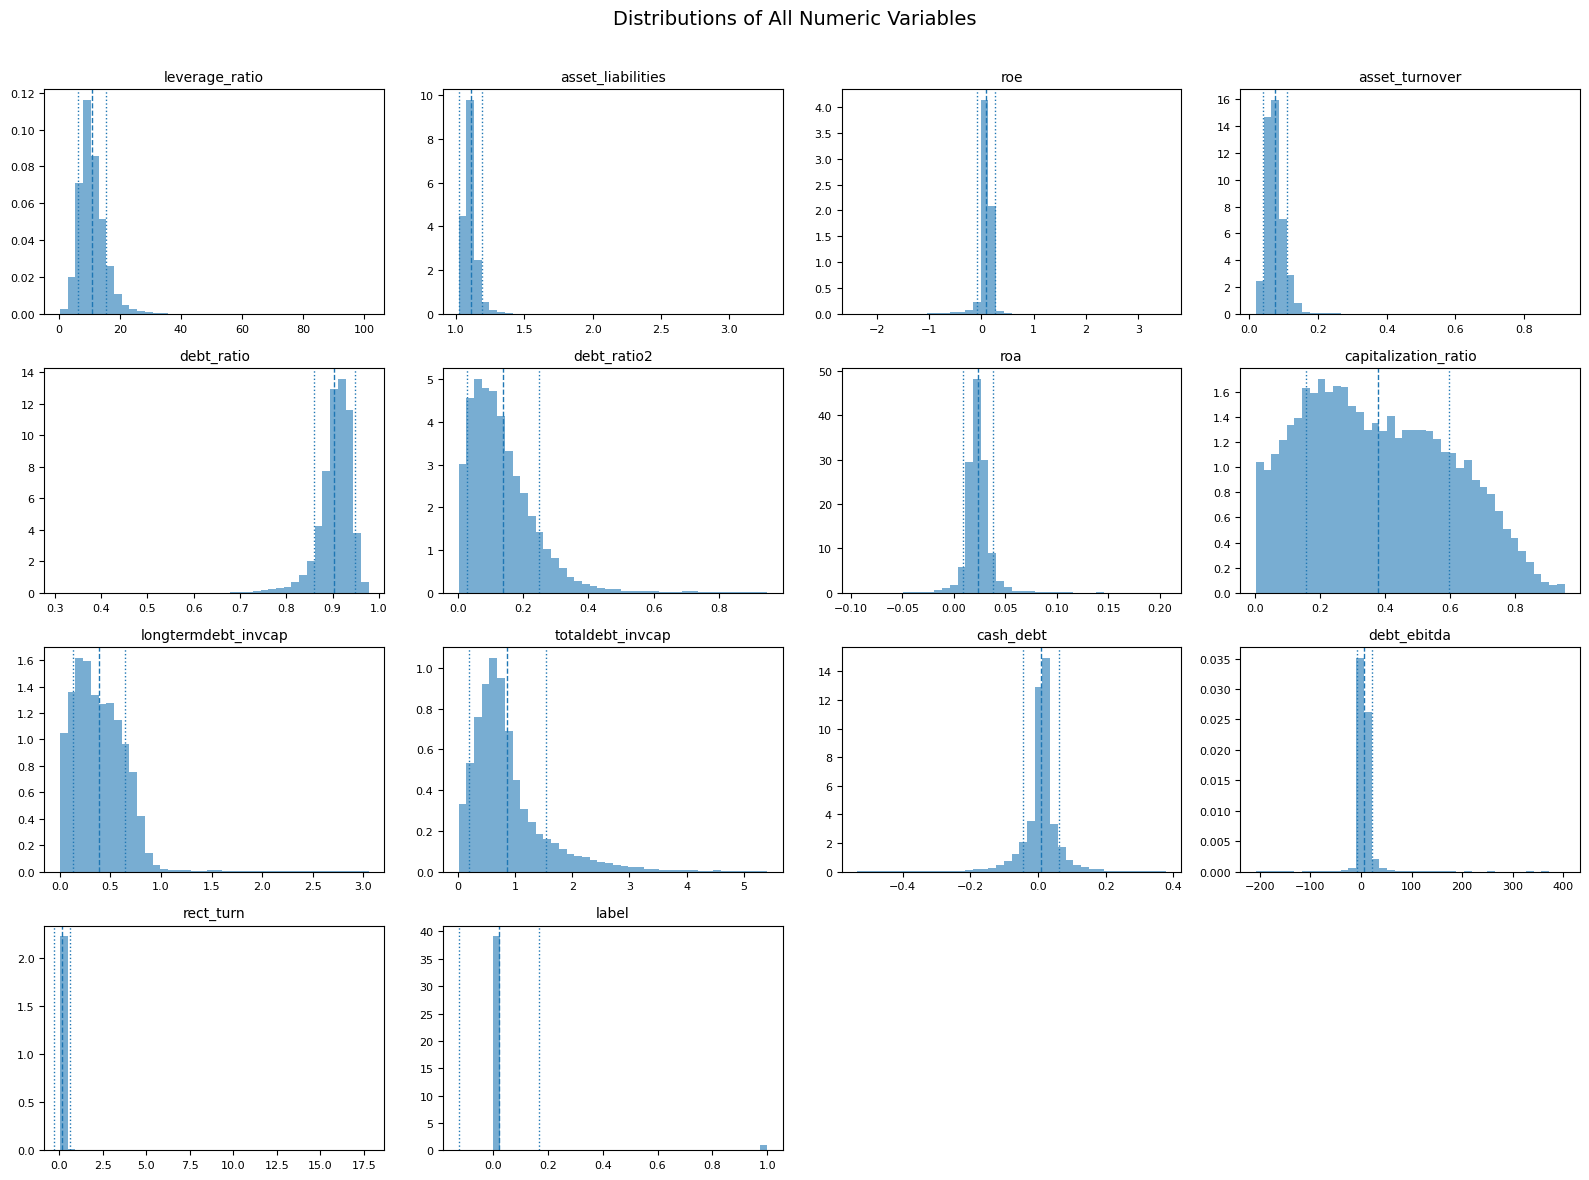

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

# ---------------------------------
# 0) 데이터 로드
# --------------------------------
df = pd.read_csv("training_data_original.csv")

# ---------------------------------
# 1) 수치형 컬럼만 선택
# ---------------------------------
num_df = df.select_dtypes(include=[np.number]).copy()

# 불필요한 인덱스 컬럼 제거 (있을 경우)
for col in ["Unnamed: 0", "index", "id"]:
    if col in num_df.columns:
        num_df = num_df.drop(columns=[col])

cols = num_df.columns.tolist()
n = len(cols)

print(f"[INFO] Number of numeric variables: {n}")

# ---------------------------------
# 2) subplot grid 크기 계산
# ---------------------------------
n_cols = 4                          # 한 줄에 4개 (조절 가능)
n_rows = math.ceil(n / n_cols)

fig, axes = plt.subplots(
    n_rows, n_cols,
    figsize=(4 * n_cols, 3 * n_rows),
    squeeze=False
)

# ---------------------------------
# 3) 각 변수 분포 그리기
# ---------------------------------
for idx, col in enumerate(cols):
    r = idx // n_cols
    c = idx % n_cols
    ax = axes[r, c]

    x = num_df[col].dropna().values
    if len(x) == 0:
        ax.set_visible(False)
        continue

    mu = np.mean(x)
    sigma = np.std(x, ddof=1)

    ax.hist(x, bins=40, density=True, alpha=0.6)
    
    # 평균 / ±1σ 표시
    ax.axvline(mu, linestyle="--", linewidth=1)
    ax.axvline(mu + sigma, linestyle=":", linewidth=1)
    ax.axvline(mu - sigma, linestyle=":", linewidth=1)

    ax.set_title(col, fontsize=10)
    ax.tick_params(axis='both', labelsize=8)

# 남는 subplot 숨김
for j in range(n, n_rows * n_cols):
    r = j // n_cols
    c = j % n_cols
    axes[r, c].set_visible(False)

plt.suptitle("Distributions of All Numeric Variables", fontsize=14)
plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.show()
